In [249]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
import numpy as np

In [250]:
train = pd.read_csv('airbnb-recruiting-new-user-bookings/train_users_2.csv')
test = pd.read_csv('airbnb-recruiting-new-user-bookings/test_users.csv')

In [251]:
print(test.shape)
print(train.shape)

(62096, 15)
(213451, 16)


In [252]:
print(test.columns)
print(train.columns)

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')
Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [253]:
train_y = train['country_destination']
train.drop(['country_destination', 'id'], axis=1, inplace=True)

In [254]:
df = pd.concat([train, test], sort=False)

In [255]:
def explore(data):
    summaryDf = pd.DataFrame(data.dtypes, columns=['dtypes'])
    summaryDf = summaryDf.reset_index()
    summaryDf['Name'] = summaryDf['index']
    summaryDf['Missing'] = data.isnull().sum().values
    summaryDf['Total'] = data.count().values
    summaryDf['MissPerc'] = (summaryDf['Missing']/summaryDf['Total'])*100
    summaryDf['NumUnique'] = data.nunique().values
    summaryDf['UniqueVals'] = [data[col].unique() for col in data.columns]
    print(summaryDf.head(50))

In [256]:
explore(df)

                      index   dtypes                     Name  Missing  \
0      date_account_created   object     date_account_created        0   
1    timestamp_first_active    int64   timestamp_first_active        0   
2        date_first_booking   object       date_first_booking   186639   
3                    gender   object                   gender        0   
4                       age  float64                      age   116866   
5             signup_method   object            signup_method        0   
6               signup_flow    int64              signup_flow        0   
7                  language   object                 language        0   
8         affiliate_channel   object        affiliate_channel        0   
9        affiliate_provider   object       affiliate_provider        0   
10  first_affiliate_tracked   object  first_affiliate_tracked     6085   
11               signup_app   object               signup_app        0   
12        first_device_type   object  

# Data Exploration

In [257]:
df.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [258]:
df.loc[(df['age'] < 16) | (df['age'] > 90), 'age'] = np.nan

In [259]:
df

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,id
0,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NaN
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NaN
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NaN
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,cv0na2lf5a
62092,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,zp8xfonng8
62093,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,fa6260ziny
62094,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,87k0fy4ugm


In [260]:
df['date_account_created'] = pd.to_datetime(df['date_account_created'])
df['date_first_booking'] = pd.to_datetime(df['date_first_booking'])
df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active']/1000000, format='%Y%m%d')

In [283]:
df['year_acc'] = pd.DatetimeIndex(df['date_account_created']).year
df['month_acc'] = pd.DatetimeIndex(df['date_account_created']).month
df['day_acc'] = pd.DatetimeIndex(df['date_account_created']).day
df['weekday_acc'] = pd.DatetimeIndex(df['date_account_created']).weekday
# df.drop(['date_account_created'], axis=1, inplace=True)

In [262]:
df.loc[df['gender']=='-unknown-', 'gender'] = np.nan

In [284]:
df['year_act'] = pd.DatetimeIndex(df['timestamp_first_active']).year
df['month_act'] = pd.DatetimeIndex(df['timestamp_first_active']).month
df['day_act'] = pd.DatetimeIndex(df['timestamp_first_active']).day
df['weekday_act'] = pd.DatetimeIndex(df['timestamp_first_active']).weekday
# df.drop(['timestamp_first_active'], axis=1, inplace=True)

In [285]:
df['year_fb'] = pd.DatetimeIndex(df['date_first_booking']).year
df['month_fb'] = pd.DatetimeIndex(df['date_first_booking']).month
df['day_fb'] = pd.DatetimeIndex(df['date_first_booking']).day
df['weekday_fb'] = pd.DatetimeIndex(df['date_first_booking']).weekday
# df.drop(['date_first_booking'], axis=1, inplace=True)

In [287]:
df

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,id,year_acc,month_acc,day_acc,year_act,month_act,day_act,year_fb,month_fb,day_fb,weekday_fb,weekday_acc,weekday_act
0,2010-06-28,2009-03-19,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NaN,2010,6,28,2009,3,19,NaN,NaN,NaN,NaN,0,3
1,2011-05-25,2009-05-23,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NaN,2011,5,25,2009,5,23,NaN,NaN,NaN,NaN,2,5
2,2010-09-28,2009-06-09,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN,2010,9,28,2009,6,9,2010.0,8.0,2.0,0.0,1,1
3,2011-12-05,2009-10-31,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NaN,2011,12,5,2009,10,31,2012.0,9.0,8.0,5.0,0,5
4,2010-09-14,2009-12-08,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NaN,2010,9,14,2009,12,8,2010.0,2.0,18.0,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,2014-09-30,2014-09-30,NaT,NaN,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,cv0na2lf5a,2014,9,30,2014,9,30,NaN,NaN,NaN,NaN,1,1
62092,2014-09-30,2014-09-30,NaT,NaN,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,zp8xfonng8,2014,9,30,2014,9,30,NaN,NaN,NaN,NaN,1,1
62093,2014-09-30,2014-09-30,NaT,NaN,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,fa6260ziny,2014,9,30,2014,9,30,NaN,NaN,NaN,NaN,1,1
62094,2014-09-30,2014-09-30,NaT,NaN,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,87k0fy4ugm,2014,9,30,2014,9,30,NaN,NaN,NaN,NaN,1,1


In [265]:
df_age = df.loc[df.age.notnull()]

Check if being within a certain age group means you're more likely to go abroad somewhere else

In [266]:
train = pd.read_csv('airbnb-recruiting-new-user-bookings/train_users_2.csv')
train_age = train.loc[train.age.notnull()]

In [267]:
train_age.loc[(train_age.age >= 18) & (train_age.age < 36), 'age_group'] = '18-36'
train_age.loc[(train_age.age >= 36) & (train_age.age < 54), 'age_group'] = '36-54'
train_age.loc[(train_age.age >= 54) & (train_age.age < 72), 'age_group'] = '54-72'
train_age.loc[(train_age.age >= 72) & (train_age.age < 90), 'age_group'] = '72-90'

In [268]:
train_age.loc[train_age['age_group']=='36-54']['country_destination'].value_counts()

NDF      18667
US       14569
other     2286
FR        1235
IT         614
GB         568
ES         466
CA         372
DE         258
NL         169
AU         157
PT          40
Name: country_destination, dtype: int64

### Seeing distribution of destination according to age group

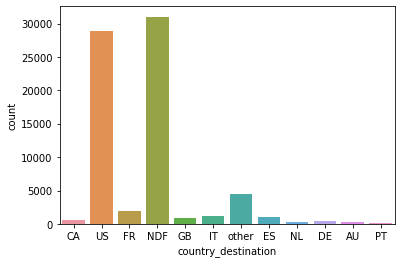

In [269]:
sns.countplot(train_age.loc[train_age['age_group']=='18-36']['country_destination'])

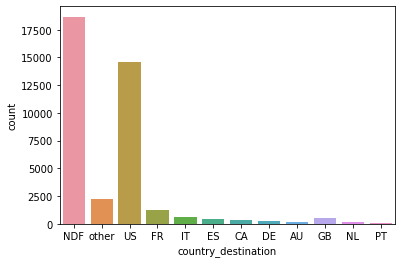

In [270]:
sns.countplot(train_age.loc[train_age['age_group']=='36-54']['country_destination'])

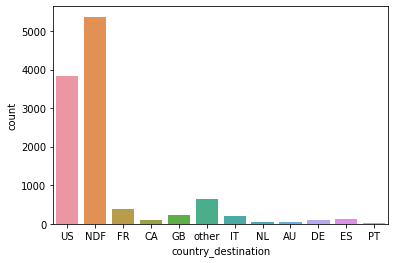

In [271]:
sns.countplot(train_age.loc[train_age['age_group']=='54-72']['country_destination'])

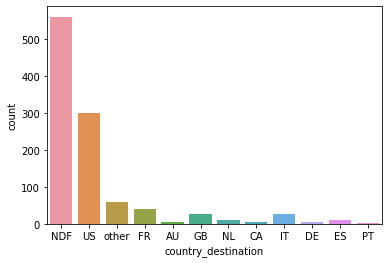

In [272]:
sns.countplot(train_age.loc[train_age['age_group']=='72-90']['country_destination'])

In [273]:
np.linspace(18,36,5)

array([18. , 22.5, 27. , 31.5, 36. ])

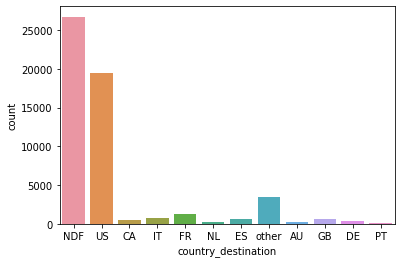

In [274]:
sns.countplot(train.loc[train['gender']=='MALE']['country_destination'])

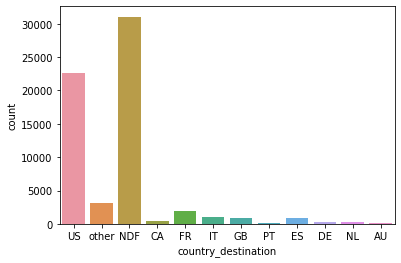

In [275]:
sns.countplot(train.loc[train['gender']=='FEMALE']['country_destination'])

In [276]:
train.loc[train['gender']=='MALE']['country_destination'].value_counts()

NDF      26719
US       19457
other     3443
FR        1335
IT         699
GB         682
ES         677
CA         477
DE         416
NL         278
AU         188
PT          69
Name: country_destination, dtype: int64

Text(0.5, 0, 'Destination Country')

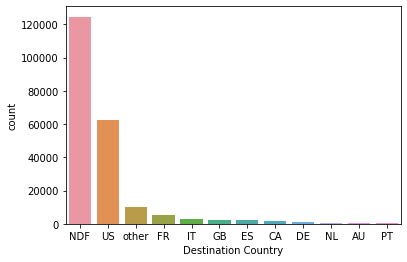

In [277]:
sns.countplot(x="country_destination", data=train, order=list(train['country_destination'].value_counts().keys()))
plt.xlabel('Destination Country')

In [278]:
(df.language.value_counts()/df.shape[0])*100

en           96.367589
zh            0.955917
fr            0.547275
es            0.426062
ko            0.405013
de            0.354567
it            0.229725
ru            0.184361
ja            0.125206
pt            0.116858
sv            0.063873
nl            0.048631
tr            0.033388
da            0.027219
pl            0.027219
no            0.018509
cs            0.017783
el            0.010887
th            0.010162
hu            0.009073
id            0.008347
fi            0.007258
ca            0.002177
is            0.001815
hr            0.000726
-unknown-     0.000363
Name: language, dtype: float64

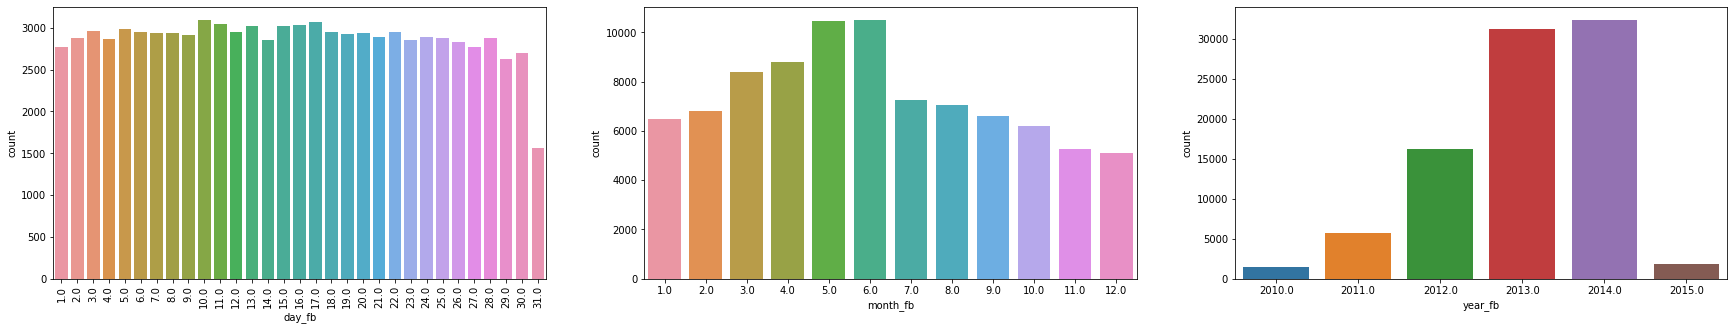

In [279]:
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
sns.countplot(df['day_fb'])
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(df['month_fb'])
plt.subplot(1,3,3)
sns.countplot(df['year_fb'])
plt.show()

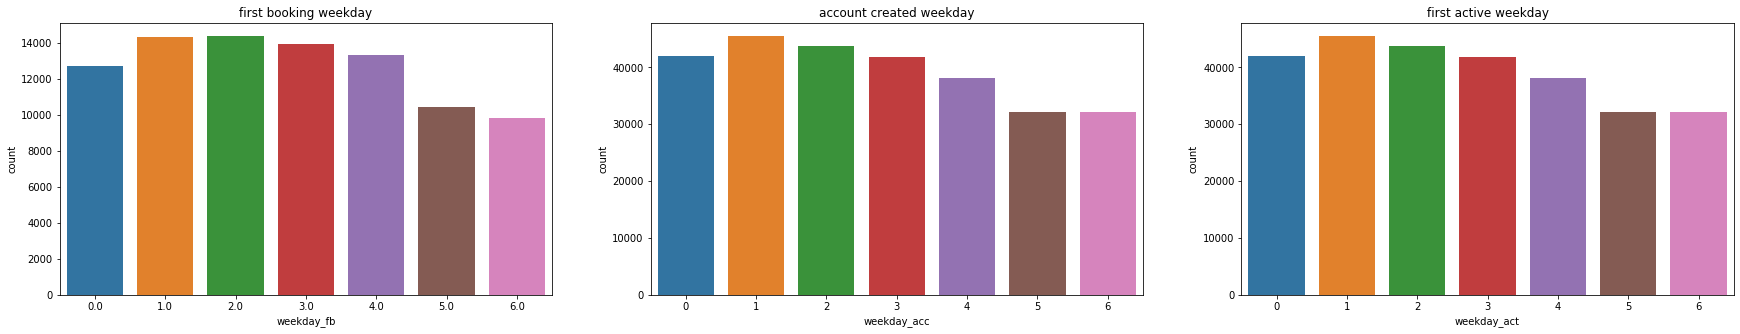

In [288]:
plt.figure(figsize=(30,5))
sb1 = plt.subplot(1,3,1)
sb1.title.set_text('first booking weekday')
sns.countplot(df['weekday_fb'])
sb2 = plt.subplot(1,3,2)
sb2.title.set_text('account created weekday')
sns.countplot(df['weekday_acc'])
sb3 = plt.subplot(1,3,3)
sb3.title.set_text('first active weekday')
sns.countplot(df['weekday_act'])
plt.show()

cyclic encoding of dates/years/days etc

then model w lightgbm

In [297]:
explore(df)

                      index          dtypes                     Name  Missing  \
0      date_account_created  datetime64[ns]     date_account_created        0   
1    timestamp_first_active  datetime64[ns]   timestamp_first_active        0   
2        date_first_booking  datetime64[ns]       date_first_booking   186639   
3                    gender          object                   gender   129480   
4                       age         float64                      age   119862   
5             signup_method          object            signup_method        0   
6               signup_flow           int64              signup_flow        0   
7                  language          object                 language        0   
8         affiliate_channel          object        affiliate_channel        0   
9        affiliate_provider          object       affiliate_provider        0   
10  first_affiliate_tracked          object  first_affiliate_tracked     6085   
11               signup_app 

In [ ]:
def encodeCyclic(data):
    data['day_sin'] = np.sin(data.day * (2. * np.pi / 24))
    data['day_cos'] = np.cos(data.day * (2. * np.pi / 24))
    data['month_sin'] = np.sin((data.month - 1) * (2. * np.pi / 12))
    data['month_cos'] = np.cos((data.month - 1) * (2. * np.pi / 12))
    return data.drop(['day', 'month'], axis=1)